# week8 exercise
### FFT of time series data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### load the data, extract time and january

In [2]:
atl = np.genfromtxt('DATA/atlanta_temperature.tsv',delimiter='\t')
x = atl[:,0]
y = atl[:,1]

### apply FFT and get frequency axis

In [3]:
N=np.size(x)
c = np.fft.fft(y)
freq = np.fft.fftfreq(N)

### visualize the variance contained within each frequency

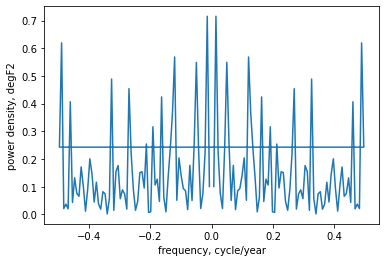

In [4]:
var=c[1:N+1]*np.conj(c[1:N+1])/N/(N-1)
freq0=freq[1:N+1]
plt.plot(freq0,var.real);
plt.xlabel('frequency, cycle/year')
plt.ylabel('power density, degF2');

### practically, we just need to consider positive/negative frequencies

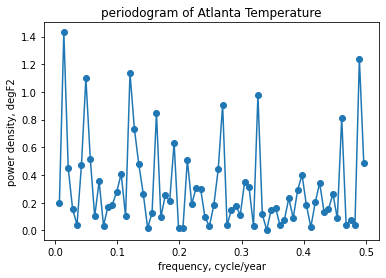

In [5]:
var1=2*var[0:int((N-1)/2)]
freq1=freq0[0:int((N-1)/2)]
plt.plot(freq1,var1.real,'o-');
plt.xlabel('frequency, cycle/year')
plt.ylabel('power density, degF2');
plt.title('periodogram of Atlanta Temperature');

### Application 1: data compression, approximation with reduced dimensions
### let's pick up only strong frequency components : X% compression factor
### Truncation: In the frequency domain, I look at X percentile value of Fourier coefficient, and only retain stronger coefficients by setting weaker ones to zero.  

In [6]:
X=75
c2=c*np.conj(c)/N/(N-1)
index10=np.percentile(c2,X)
c10=c
c10[c2.real<index10]=0 # remove all weak frequency components

### plot the periodogram of filtered data

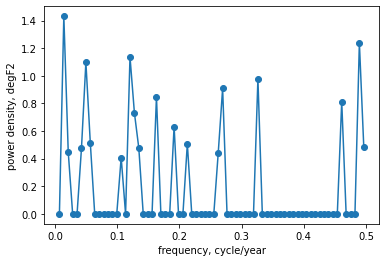

In [7]:
var=c10[1:N+1]*np.conj(c10[1:N+1])/N/(N-1)
var1=2*var[0:int((N-1)/2)]
freq1=freq0[0:int((N-1)/2)]
plt.plot(freq1,var1.real,'o-');
plt.xlabel('frequency, cycle/year')
plt.ylabel('power density, degF2');

### inverse fft to reconstrct in time domain

In [8]:
yest=np.fft.ifft(c10)

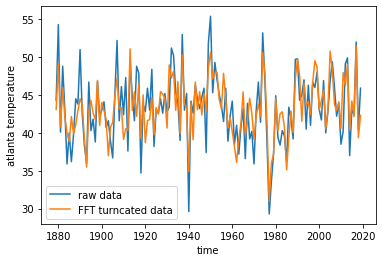

In [9]:
### plot it
plt.plot(x,y)
plt.plot(x,yest.real);
plt.xlabel('time')
plt.ylabel('atlanta temperature')
plt.legend(('raw data','FFT turncated data'))

### check how much variance is retained in the X percentile Fourier coefficients

In [10]:
y_var=np.var(y)
yest_var=np.var(yest.real)
print('The FFT-filtered data retained '+str(round(yest_var/y_var*100,3))+' percent of variance')

The FFT-filtered data retained 62.966 percent of variance


### check the correlation

In [11]:
Rval=np.corrcoef(y,yest.real)
print('The correlation is '+str(round(Rval[0,1],3)))

The correlation is 0.794


### Application 2: FFT frequency filter
### Let's say we are only interested in 10+ year frequency for climate studies
### We truncate the Fourier coefficient of higher frequency than 1/10 years. 

In [12]:
Period=20
cutoff_freq=1/Period
cflt=c
cflt[abs(freq)>cutoff_freq]=0;

In [13]:
### Plot the periodogram of filtered data

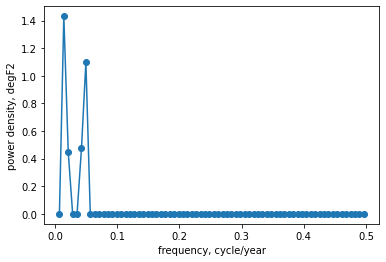

In [14]:
var=cflt[1:N+1]*np.conj(cflt[1:N+1])/N/(N-1)
var1=2*var[0:int((N-1)/2)]
freq1=freq0[0:int((N-1)/2)]
plt.plot(freq1,var1.real,'o-');
plt.xlabel('frequency, cycle/year')
plt.ylabel('power density, degF2');

### inverse fft to reconstrct in time domain

In [15]:
yest=np.fft.ifft(cflt)

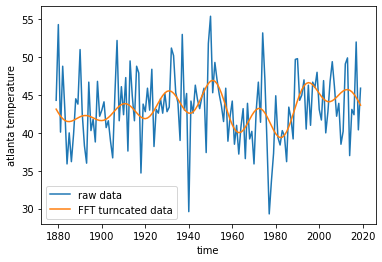

In [16]:
### plot it
plt.plot(x,y)
plt.plot(x,yest.real);
plt.xlabel('time')
plt.ylabel('atlanta temperature')
plt.legend(('raw data','FFT turncated data'));

### check how much variance is retained in the filtered data

In [17]:
y_var=np.var(y)
yest_var=np.var(yest.real)
print('The FFT-filtered data retained '+str(round(yest_var/y_var*100,3))+' percent of variance')

The FFT-filtered data retained 16.015 percent of variance


### check the correlation

In [18]:
Rval=np.corrcoef(y,yest.real)
print('The correlation is '+str(round(Rval[0,1],3)))

The correlation is 0.4
